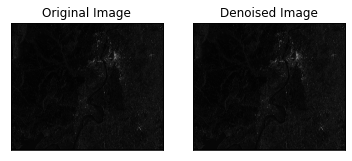

In [3]:
#Noise Reduction
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\lab 1\\HH-ALPSRP236700490-H2.2_UA.tif", 0)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0) 
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
cv2.imwrite('denoised_image.tif', blurred_image)


True

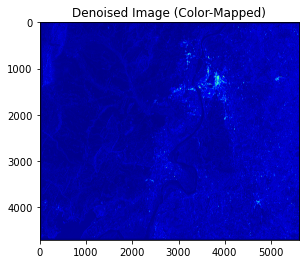

In [5]:
#Color Mapping
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\lab 1\\HH-ALPSRP236700490-H2.2_UA.tif", 0)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [6]:
#Mean Squared Error
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread("C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\lab 1\\HH-ALPSRP236700490-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 5.127390653495441


In [7]:
#Structural Similarity Index (SSIM)
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread("C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\lab 1\\HH-ALPSRP236700490-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9469101241328085


In [8]:
#Reading Specific Pixel Value
import cv2
import numpy as np

original_image = cv2.imread(r"C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\lab 1\\HH-ALPSRP236700490-H2.2_UA.tif", 0) 

denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 13
Denoised pixel value at (150, 150): 11


Original Image Amplitude (Magnitude):
[[1295.         6973.51532157 6799.29815074 ... 4751.09183681
  6799.29815074 6973.51532157]
 [3853.98195081 5211.44741876 6007.19569047 ... 2831.85779572
  7399.56532652 6043.96903244]
 [6143.43848103 1046.88121798 5490.75528135 ... 5566.96108382
  4863.09089569 4260.79473791]
 ...
 [4725.06786983 5657.2068516  4740.1453782  ... 5945.32968748
  4571.62701739 5776.70638051]
 [6143.43848103 4260.79473791 4863.09089569 ... 3952.82242339
  5490.75528135 1046.88121798]
 [3853.98195081 6043.96903244 7399.56532652 ... 6149.31248137
  6007.19569047 5211.44741876]]
Denoised Image Amplitude (Magnitude):
[[2139.         1052.98030811  459.44139148 ...  879.33967489
   459.44139148 1052.98030811]
 [1033.73555771 1444.73098891 2085.0001677  ...  724.49205073
  1133.52061159 1069.76228555]
 [1262.8022158  1174.9386545   381.59382619 ...  188.39677421
  2003.90515299  189.6432846 ]
 ...
 [1144.27372611  534.25094372  534.59454131 ... 2089.87444551
  1162.1334411

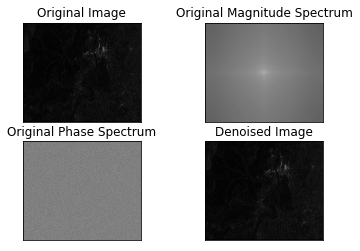

In [18]:
#Fourier Transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread(r"C:\\Users\\Nadeem\\Desktop\\6th semester\\digital image processing\\lab 1\\HH-ALPSRP236700490-H2.2_UA.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)


if original_image is not None and denoised_image is not None:
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")